# Mineração de Dados

## Trabalho 1: Classificação

- Felipe Churuyuki Chinen (496235)
- Victor Calefi Ramos (587230)

## Bank Marketing Data Set

### Resumo

Os dados estão relacionados à campanhas de marketing de uma instituição financeira portuguesa. As campanhas foram baseadas em ligações telefônicas, logo, foram necessárias varias ligações para o mesmo cliente a fim de receber uma resposta.

### Classificação

O objetivo da classificação é predizer se um cliente irá assinar um termo de investimento ou não (yes/no).

### Características

- Tipos de Atributos: Variados
- Número de Atributos: 20
- Número de Objetos: 41188
- Natureza dos Dados: Negócios

### Atributos

- age
    - Idade do cliente
    - Tipo: Numérico
    - Valores: [17..98]
- job
    - Profissão exercida pelo cliente
    - Tipo: Categórico
    - Valores: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'
- marital
    - Status civil do cliente
    - Tipo: Categórico
    - Valores: 'divorced', 'married', 'single', 'unknown'
- education
    - Grau de educação do cliente
    - Tipo: Categórico
    - Valores: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
- default
    - Tipo: Categórico
    - Valores: 'no', 'yes', 'unknown'
- housing
    - Cliente possui empréstimo para habitação
    - Tipo: Categórico
    - Valores: 'no', 'yes', 'unknown'
- loan
    - Cliente possui empréstimo pessoal
    - Tipo: Categórico
    - Valores: 'no', 'yes', 'unknown'
- contact
    - Tipo de comunicação utilizada para contatar o cliente
    - Tipo: Categórico
    - Valores:  'cellular', 'telephone'
- month
    - Última vez em que o cliente foi contatado (mês)
    - Tipo: Categórico
    - Valores: 'jan'..'dec'
- day_of_week
    - Última vez em que o cliente foi contatado (dia)
    - Tipo: Categórico
    - Valores: 'mon', 'tue', 'wed', 'thu', 'fri'
- duration
    - Duração da última ligação (segundos)
    - Tipo: Numérico
    - Valores: [0..4918]
- campaign
    - Número de vezes que o cliente foi contatado durante essa campanha
    - Tipo: Numérico
    - Valores: [1..56]
- pdays
    - Número de dias desde que o cliente foi contatado em uma campanha anterior
    - Tipo: Numérico
    - Valores: [0..999]
- previous
    - Número de vezes que o cliente foi contatado antes dessa campanha
    - Tipo: Numérico
    - Valores: [0..7]
- poutcome
    - Resultado da última campanha (para cada cliente)
    - Tipo: Categórico
    - Valores: 'failure', 'nonexistent', 'success'
- emp.var.rate
    - Taxa de variação do emprego
    - Tipo: Numérico
    - Valores: [-3.4..1.4]
- cons.price.idx
    - Índice de preços ao consumidor
    - Tipo: Numérico
    - Valores: [92.201..94.767]
- cons.conf.idx
    - Índice de confiança do consumidor
    - Tipo: Numérico
    - Valores: [-50.8..-26.9]
- euribor3m
    - Taxa Euribor (taxa interbancária oferecida em euro) de 3 meses (indicador diário)
    - Tipo: Numérico
    - Valores: [0.634..5.045]
- nr.employed
    - Número de empregados
    - Tipo: Numérico
    - Valores: [4963.6..5228.1]
- y
    - Resultado da campanha (se cliente aderiou ou não ao investimento)
    - Tipo: Categórico
    - Valores: 'yes', 'no'

## Pré-processamento

In [301]:
import numpy as np
import pandas as pd

# Localização do arquivo
filepath = 'bank-additional-full.csv'
# Importanto os dados
data = pd.read_csv(filepath, sep = ';')

Num primeiro momento é necessário visualizar de uma maneira mais descritiva o formato dos dados do nosso dataset. Para isso iremos utilizar uma função que descreve os dados na forma de uma tabela com propriedades como: maioria dos dados, média, frequência, mínimo, máximo, etc.

Note que os dados que são apresentados como NaN, são atributos com valores categóricos sobre os quais os cálculos de média, frequência, etc não podem ser aplicados.

In [302]:
# Imprime uma estatística descritiva para uma melhor visualização da distribuição dos dados
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [303]:
# Amostragem de 5 objetos sem reposição
sample = data.sample(n=5)
display(sample)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
13915,40,housemaid,married,basic.4y,unknown,no,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
26790,41,blue-collar,married,basic.4y,no,no,no,cellular,nov,thu,...,3,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no
33580,28,unemployed,married,high.school,unknown,yes,no,telephone,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
19069,34,admin.,single,university.degree,no,yes,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
38118,35,technician,married,university.degree,no,yes,yes,cellular,sep,thu,...,3,999,0,nonexistent,-3.4,92.379,-29.8,0.743,5017.5,no


A partir desse ponto iniciaremos a etapa de Seleção de Atributos.

Alguns atributos podem prejudicar a geração de um modelo preditivo, nesse caso tais atributos devem ser descartados a fim de melhorar a qualidade do modelo gerado (sem prejudicar sua acurácia).

O primeiro atributo a ser observado é o 'duration'.
Dentre as informações originais fornecidas pela fonte do dataset é informado que o atributo deve usado somente para propósitos de benchmark, pois o mesmo pode prejudicar a geração de modelos preditivos. Por isso o atributos será removido.

In [304]:
# Remove o atributo 'duration' do dataset
data = data.drop(columns = 'duration')

Os próximos dois atributos a serem observados são 'poutcome' e 'pdays'. Ambos dados indicam a participação, ou não, de um cliente em campanhas passadas da instituição. Como a maioria dos clientes não participaram de campanhas anteriores, consideramos a classe majoritária como clientes novos (mais de 86%). Por isso ambos atributos serão descartados.

In [305]:
# Verifica quantas tuplas possuem o valor 'nonexistent' no atributo 'poutcome'
# Isso significa que o cliente não participou de nenhuma campanha de marketing anterior a essa
data[data['poutcome'] == 'nonexistent'].count()

age               35563
job               35563
marital           35563
education         35563
default           35563
housing           35563
loan              35563
contact           35563
month             35563
day_of_week       35563
campaign          35563
pdays             35563
previous          35563
poutcome          35563
emp.var.rate      35563
cons.price.idx    35563
cons.conf.idx     35563
euribor3m         35563
nr.employed       35563
y                 35563
dtype: int64

In [306]:
# Levando em conta que mais de 86% dos clientes dessa campanha não haviam participado de campanhas anteriores
# O atributo será descartado para se adequar a maioria dos dados
data = data.drop(columns = 'poutcome')

In [307]:
# Verifica quantas tuplas possuem o valor '999' no atributo 'pdays'
# Isso significa que o cliente não foi contatado em nenhuma campanha de marketing anterior a essa
data[data['pdays'] == 999].count()

age               39673
job               39673
marital           39673
education         39673
default           39673
housing           39673
loan              39673
contact           39673
month             39673
day_of_week       39673
campaign          39673
pdays             39673
previous          39673
emp.var.rate      39673
cons.price.idx    39673
cons.conf.idx     39673
euribor3m         39673
nr.employed       39673
y                 39673
dtype: int64

In [308]:
# Levando em conta que mais de 96% dos clientes dessa campanha não haviam participado de campanhas anteriores
# O atributo será descartado para se adequar a maioria dos dados
data = data.drop(columns = 'pdays')

O próximo passo importante é lidar com atributos faltantes. Como a quantidade de dados no dataset é grande, podemos optar por remover as tuplas que possuem atributos faltantes, assim o modelo gerado será mais fiel ao conjunto de dados.

In [309]:
# Converte atributos faltantes (com valores 'unknown') para valores não válidos
data = data.replace({'unknown' : np.nan})
# Remove todas as tuplas de dados que possuem valores não válidos
data = data[(data.notna()).all(axis=1)]
# Informa a quantidade de tuplas resultates da operação
data.shape

(30488, 18)

Após selecionar atributos para serem removidos e ajustar os dados removendo tuplas com valores faltantes o próximo passo é transformar os atributos categóricos em numéricos utilizando o Label Encoder (não há a necessidade do One Hot Enconding, uma vez que utilizaremos os métodos de árvores de decisão e naive bayes), dessa forma poderemos trabalhar com os modelos de classificação disponiveis no SciKit Learn.

In [310]:
# Mostra os tipos de dados presentes no dataset
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [311]:
# Importando LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Cria uma instância do LabelEncoder
labelEncoder = LabelEncoder()

Para cada atributo categórico presente no dataset iremos converter os possiveis valores para valores numéricos.

Convertendo valores de 'job'.

In [312]:
# Carrega os valores de 'job'
job_labels = labelEncoder.fit_transform(data['job'])
# Mapeia cada possivel valor de 'job' e enumera os mesmos
job_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'job' para os correspondentes enumerados
data['job'] = job_labels
# Imprimi o mapeamento correspondente
job_mappings

{0: 'admin.',
 1: 'blue-collar',
 2: 'entrepreneur',
 3: 'housemaid',
 4: 'management',
 5: 'retired',
 6: 'self-employed',
 7: 'services',
 8: 'student',
 9: 'technician',
 10: 'unemployed'}

Convertendo valores de 'marital'.

In [313]:
# Carrega os valores de 'marital'
marital_labels = labelEncoder.fit_transform(data['marital'])
# Mapeia cada possivel valor de 'marital' e enumera os mesmos
marital_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'marital' para os correspondentes enumerados
data['marital'] = marital_labels
# Imprimi o mapeamento correspondente
marital_mappings

{0: 'divorced', 1: 'married', 2: 'single'}

Convertendo valores de 'education'.

In [314]:
# Carrega os valores de 'education'
education_labels = labelEncoder.fit_transform(data['education'])
# Mapeia cada possivel valor de 'education' e enumera os mesmos
education_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'education' para os correspondentes enumerados
data['education'] = education_labels
# Imprimi o mapeamento correspondente
education_mappings

{0: 'basic.4y',
 1: 'basic.6y',
 2: 'basic.9y',
 3: 'high.school',
 4: 'illiterate',
 5: 'professional.course',
 6: 'university.degree'}

Convertendo valores de 'default'.

In [315]:
# Carrega os valores de 'default'
default_labels = labelEncoder.fit_transform(data['default'])
# Mapeia cada possivel valor de 'default' e enumera os mesmos
default_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'default' para os correspondentes enumerados
data['default'] = default_labels
# Imprimi o mapeamento correspondente
default_mappings

{0: 'no', 1: 'yes'}

Convertendo valores de 'housing'.

In [316]:
# Carrega os valores de 'housing'
housing_labels = labelEncoder.fit_transform(data['housing'])
# Mapeia cada possivel valor de 'housing' e enumera os mesmos
housing_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'housing' para os correspondentes enumerados
data['housing'] = housing_labels
# Imprimi o mapeamento correspondente
housing_mappings

{0: 'no', 1: 'yes'}

Convertendo valores de 'loan'.

In [317]:
# Carrega os valores de 'loan'
loan_labels = labelEncoder.fit_transform(data['loan'])
# Mapeia cada possivel valor de 'loan' e enumera os mesmos
loan_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'loan' para os correspondentes enumerados
data['loan'] = loan_labels
# Imprimi o mapeamento correspondente
loan_mappings

{0: 'no', 1: 'yes'}

Convertendo os valores de 'contact'.

In [318]:
# Carrega os valores de 'contact'
contact_labels = labelEncoder.fit_transform(data['contact'])
# Mapeia cada possivel valor de 'contact' e enumera os mesmos
contact_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'contact' para os correspondentes enumerados
data['contact'] = contact_labels
# Imprimi o mapeamento correspondente
contact_mappings

{0: 'cellular', 1: 'telephone'}

Convertendo os valores de 'month'.

In [319]:
# Carrega os valores de 'month'
month_labels = labelEncoder.fit_transform(data['month'])
# Mapeia cada possivel valor de 'month' e enumera os mesmos
month_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'month' para os correspondentes enumerados
data['month'] = month_labels
# Imprimi o mapeamento correspondente
month_mappings

{0: 'apr',
 1: 'aug',
 2: 'dec',
 3: 'jul',
 4: 'jun',
 5: 'mar',
 6: 'may',
 7: 'nov',
 8: 'oct',
 9: 'sep'}

Convertendo os valores de 'day_of_week'.

In [320]:
# Carrega os valores de 'day_of_week'
dayofweek_labels = labelEncoder.fit_transform(data['day_of_week'])
# Mapeia cada possivel valor de 'day_of_week' e enumera os mesmos
dayofweek_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'day_of_week' para os correspondentes enumerados
data['day_of_week'] = dayofweek_labels
# Imprimi o mapeamento correspondente
dayofweek_mappings

{0: 'fri', 1: 'mon', 2: 'thu', 3: 'tue', 4: 'wed'}

Convertendo os valores de 'y'.

In [321]:
# Carrega os valores de 'y'
y_labels = labelEncoder.fit_transform(data['y'])
# Mapeia cada possivel valor de 'y' e enumera os mesmos
y_mappings = {index: label for index, label in enumerate(labelEncoder.classes_)}
# Substitui os valores categóricos presentes no atributo 'y' para os correspondentes enumerados
data['y'] = y_labels
# Imprimi o mapeamento correspondente
y_mappings

{0: 'no', 1: 'yes'}

In [322]:
# Imprime uma estatística descritiva para uma melhor visualização da distribuição dos dados
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,1,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,1,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
11,25,7,2,3,0,1,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
12,29,1,2,3,0,0,1,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0
13,57,3,0,0,0,1,0,1,6,1,1,0,1.1,93.994,-36.4,4.857,5191.0,0


## Classificação

### Árvore de Decisão

Um dos modelos de classificação de dados mais utilizados é a Árvore de Decisão. Utilizando dados de teste e dados de treino, treinamos árvores de diferentes níveis a fim de obter uma árvore que mais se adequa aos dados.

Para cada DTC treinada, calculamos seu Score e ao final, selecionamos a DTC com o maior Score.

In [323]:
# Importando DTC
from sklearn import tree
# Importando modulo de separação de dados de treino e teste
from sklearn.model_selection import train_test_split
# Cria uma cópia local dos dados
localData = data.copy()
# Valores a serem preditos
target = localData['y']
# Dados sem o valor a ser predito
localData = localData.drop(columns = 'y')
# Separa os dados em dados de treino e dados de teste
feature_train, feature_test, target_train, target_test = train_test_split(localData, target, test_size=0.2, random_state=42)
# Maior score dentre todas as DTCs calculadas
bestScore = 0
# Calcula score para DTC de tamanho 2 até 15
for i in range(2, 18):
    # Define a DTC
    DTC = tree.DecisionTreeClassifier(max_depth = i)
    # Treina a DTC
    DTC = DTC.fit(feature_train, target_train)
    # Testa a DTC e salva o score
    DTCScore = DTC.score(feature_test, target_test)
    # Imprime os dados da DTC da iteração atual
    print("DTC Tamanho = "+ str(i) +" Score : "+ str(DTCScore))
    # Verifica se a DTC da iteração atual é a melhor DTC calculada
    if (bestScore < DTCScore):
        # Salva a DTC atual como a melhor DTC
        bestDTC = DTC
        # Salva seu score como o melhor score
        bestScore = DTCScore
# Imprime o score da melhor DTC
print("\nMelhor Score: " + str(bestScore))

DTC Tamanho = 2 Score : 0.8697933748770088
DTC Tamanho = 3 Score : 0.878484749098065
DTC Tamanho = 4 Score : 0.8788127254837652
DTC Tamanho = 5 Score : 0.8791407018694654
DTC Tamanho = 6 Score : 0.8807805837979665
DTC Tamanho = 7 Score : 0.878484749098065
DTC Tamanho = 8 Score : 0.8791407018694654
DTC Tamanho = 9 Score : 0.8758609380124631
DTC Tamanho = 10 Score : 0.8719252213840604
DTC Tamanho = 11 Score : 0.8660216464414562
DTC Tamanho = 12 Score : 0.867005575598557
DTC Tamanho = 13 Score : 0.8632338471630042
DTC Tamanho = 14 Score : 0.861429977041653
DTC Tamanho = 15 Score : 0.8584781895703509
DTC Tamanho = 16 Score : 0.8548704493276484
DTC Tamanho = 17 Score : 0.8448671695637914

Melhor Score: 0.8807805837979665


Para uma melhor visualização do resultado, utilizamos o módulo GraphViz para gerar uma visualização gráfica da DTC com o melhor Score.

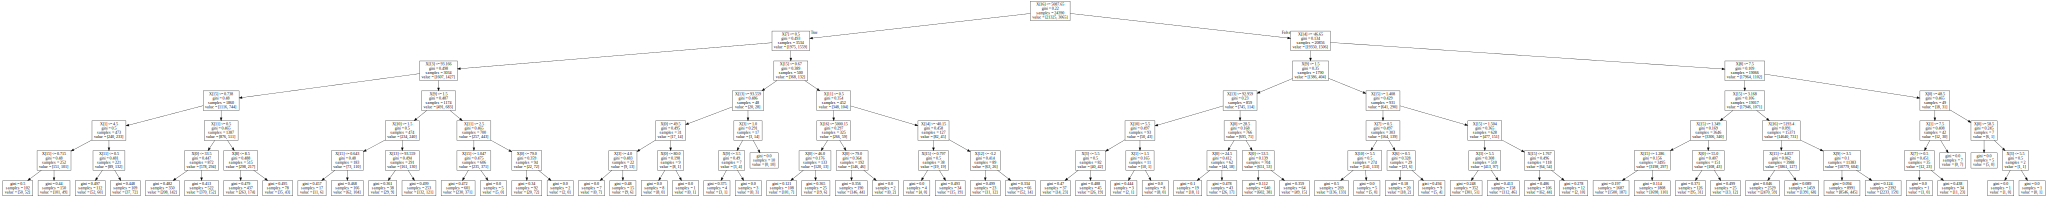

In [324]:
# Importando modulo para visualizar a DTC
import graphviz
# Gera uma visualização gráfica da DTC com melhor score
graph = graphviz.Source(tree.export_graphviz(bestDTC, out_file=None))
# Imprime a DTC
graph

### Naive Bayes

Outro método de classificação bastante utilizado e baseado em probabilidades.

Como os dados do conjunto são em sua maioria discretos, optamos por discretizar os demais dados que são continuos a fim de utilizar o Naive Bayes Multinomial, própio para conjunto de dados discretos.

Como efeito de comparação, foi aplicado os métodos Gaussiano e Bernoulli no mesmo conjunto de dados transformados.

In [325]:
# Importando módulo para discretizar os dados continuos
from sklearn.preprocessing import KBinsDiscretizer
# Importando módulo para validação cruzada
from sklearn.model_selection import cross_val_score
# Importando Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# Fazendo uma copia dos dados
localData2 = data.copy()
# Cria um encode para discretizar os dados em 4 bins utilizando 'kmeans'
encode = KBinsDiscretizer(n_bins = 4, encode='ordinal', strategy = 'kmeans')
# Aplica a transformação em cada um dos atributos continuos do conjunto de dados
localData2['emp.var.rate'] = encode.fit_transform(localData2['emp.var.rate'].values.reshape(-1, 1))
localData2['cons.price.idx'] = encode.fit_transform(localData2['cons.price.idx'].values.reshape(-1, 1))
localData2['cons.conf.idx'] = encode.fit_transform(localData2['cons.conf.idx'].values.reshape(-1, 1))
localData2['euribor3m'] = encode.fit_transform(localData2['euribor3m'].values.reshape(-1, 1))
localData2['nr.employed'] = encode.fit_transform(localData2['nr.employed'].values.reshape(-1, 1))

# Valores a serem preditos
target = localData2['y']
# Dados sem o valor a ser predito
features = localData2.drop(columns = 'y')
# Define os tipos de NB a serem aplicados nos dados
nb = {'gaussian': GaussianNB(), 'bernoulli': BernoulliNB(), 'multinomial': MultinomialNB()}
# Array para salvar os scores
scores = {}
# Calcula o CVS para cada tipo de NB
for key, model in nb.items():
    s = cross_val_score(model, features, target, cv=100, n_jobs=4, scoring='accuracy')
    scores[key] = np.mean(s)
# Imprimi a média dos scores
scores

{'gaussian': 0.6822208575118285,
 'bernoulli': 0.8616378998968007,
 'multinomial': 0.8454901566033374}